In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['text.usetex'] = True

## Normal equation: example

[216.66666667 100.        ]


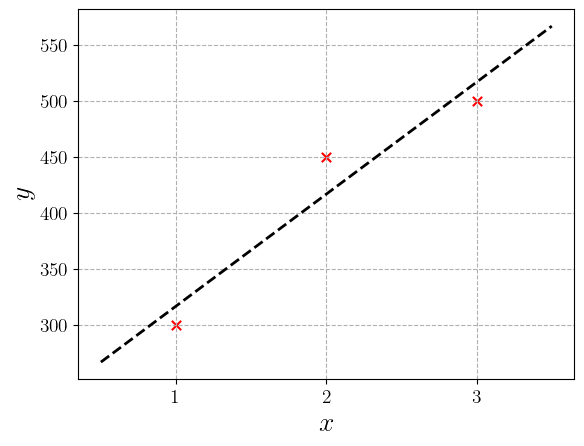

In [3]:
x_train = np.array([1, 2, 3])
y_train = np.array([300, 450, 500])
X = np.vstack((np.ones_like(x_train), x_train)).T
A = X.T @ X
r = X.T @ y_train
Theta = np.linalg.inv(A) @ r

xx = np.linspace(0.5, 3.5, 2)
XX = np.vstack((np.ones_like(xx), xx))
yy = np.dot(Theta, XX)

plt.scatter(x_train, y_train, marker='x', s=45, color='r')
plt.plot(xx, yy, 'k--', linewidth=2.0)
plt.grid(True, linestyle='--')
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.xticks(x_train, fontsize=14)
plt.yticks(np.arange(300, 551, 50),fontsize=14)
print(Theta)

In [4]:
from sklearn.linear_model import LinearRegression
X_train = x_train.reshape((-1, 1))
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
print(f"w = {linear_regr.coef_[0]}")
print(f"b = {linear_regr.intercept_}")

w = 99.99999999999996
b = 216.66666666666677


# Gradient Descent

In [5]:
def compute_cost_gradient(X, y_train, w, b):
    m, n = X.shape
    dJ_dw = np.zeros(n)
    dJ_db = 0
    for i in range(m):
        error = (np.dot(X[i], w) + b) - y_train[i]
        dJ_dw = dJ_dw + error * X[i,:]
        dJ_db = dJ_db + error
    dJ_dw = dJ_dw/m
    dJ_db = dJ_db/m
    return dJ_dw, dJ_db

In [6]:
# Using gradient descent
x_train = np.array([1, 2, 3])
y_train = np.array([300, 450, 500])

X = x_train[:, np.newaxis]
w, b = np.array([50]), 50

alpha = 0.15
max_iter = 100 ## try to increase this value to see better results
for i in range(max_iter):
    # Calculate the gradient and update the parameters
    dJ_dw, dJ_db = compute_cost_gradient(X, y_train, w, b)

    # Update Parameters using w, b, alpha and gradient
    w = w - alpha * dJ_dw               
    b = b - alpha * dJ_db

print("w =", w)
print("b =", b)

w = [108.64482699]
b = 197.01494294898754


# R squared and MSE from `sklearn`

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
y_predict = linear_regr.predict(X_train)

print(f"Mean squared error = {mean_squared_error(y_true=y_train, y_pred=y_predict)}")

print(f"r2 score = {r2_score(y_true=y_train, y_pred=y_predict)}")

Mean squared error = 555.5555555555555
r2 score = 0.923076923076923


# Polynomial Feature

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly.fit_transform(X_train)
print("X_train =")
print(repr(X_train))
print("X_poly =")
print(repr(X_poly))

X_train =
array([[1],
       [2],
       [3]])
X_poly =
array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])


In [11]:
poly = PolynomialFeatures(degree=3, include_bias=True)  # we have bias column with all values of 1

X_poly = poly.fit_transform(X_train)
print("X_train =")
print(repr(X_train))
print("X_poly =")
print(repr(X_poly))

X_train =
array([[1],
       [2],
       [3]])
X_poly =
array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])
